### INTRODUCTION

Ce projet se concentre sur les données d’une campagne marketing menée par une banque auprès de ses clients.
Cette campagne marketing vise à pousser les clients à souscrire un dépôt à terme (DAT).
Un dépôt à terme est un dépôt qu’une banque ou une institution financière offre avec un taux fixe dans lequel votre argent sera retourné à une échéance spécifique
Nous pouvons distinguer 2 objectifs possibles suite à l’étude de ces données : 
1	prédire quel client va souscrire ou non à un DAT.
2	déterminer vers quelle cible et quand la banque doit faire sa campagne marketing afin de faire souscrire un maximum de DAT.

Le Dataset est constitué de 16 variables:
1-age
2-job
3-marital
4-education
5-defaut
6-balance
7-housing
8-loan
9-contact
10-day
11-month
12-duration
13-campaign
14-pdays
15-previous
16-poutcome

La dernière colonne est notre variable cible : deposit.

Nous allons dans un premier temps expliquer et voir quelles sont les valeurs de chacune de ces variables.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme() # pour modifier le thème

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
df =  pd.read_csv('bank.csv')

df.shape

(11162, 17)

# DATA PROCESSING

In [2]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


Nous présentons ci-dessous les principales informations du jeu de données.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
#On vérifie qu'il n'y a pas de doublons
print('Il y a ',df.duplicated().sum(),' doublons dans le jeu de donnees')

Il y a  0  doublons dans le jeu de donnees


In [6]:
#On vérifie également qu'il n'y a pas de valeurs manquantes.
colonnes_na = df.isna().any(axis = 0)
print(colonnes_na.sum(), "colonnes qui contiennent des NANs. \n")

0 colonnes qui contiennent des NANs. 



Le dataset bank marketing contient 11162 lignes et 17 colonnes, il n'y a aucune valeur manquante ni de doublon.


# On analyse maintenant le contenu des différentes colonnes

## Ages des clients

Nous allons étudier l'âge des prospects et clients interrogés lors de cette campagne marketing.

In [7]:
df.age.unique()

array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89], dtype=int64)

In [8]:
print('L âge moyen des clients est de ',round (df.age.mean(),2) ,' ans.')

L âge moyen des clients est de  41.23  ans.


In [9]:
print('L âge médian des clients est de ',df.age.median(),' ans.')

L âge médian des clients est de  39.0  ans.


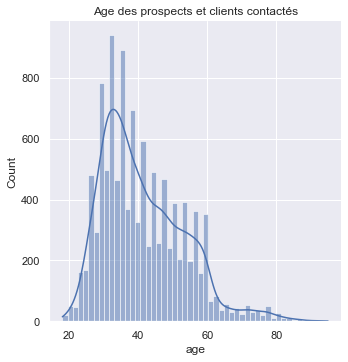

In [10]:
sns.displot(df['age'],kde=True)
plt.title('Age des prospects et clients contactés');
#Ce premier graphique permet d'avoir un apperçu de l'âge des clients contactés lors de la campagne.

Nous constatons que les prospects et clients contactés sont assez reparties par tranche d'âge avec une moyenne d'âge de 41 ans et une médiane se situant à 39 ans.

## Répartition du métier des clients 

In [11]:
print(df.job.value_counts())

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


In [12]:
round (df['job'].value_counts(normalize=True)*100,2)

management       22.99
blue-collar      17.42
technician       16.33
admin.           11.95
services          8.27
retired           6.97
self-employed     3.63
student           3.23
unemployed        3.20
entrepreneur      2.94
housemaid         2.45
unknown           0.63
Name: job, dtype: float64

Les métiers de management, blue-collar et technicien représentent plus de 50% de la population de prospects et clients interrogés. 

## Répation du Statut marital

In [13]:
print(df.marital.value_counts())

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


In [14]:
round(df['marital'].value_counts(normalize=True)*100,2)

married     56.90
single      31.52
divorced    11.58
Name: marital, dtype: float64

56% des prospects et clients ont une vie maritale et 33% sont célibataires. 11% sont divorcés.

## Type d'étude des clients 

Nous prenons l'hypothèse que primary est le niveau d'étude le plus bas.

In [15]:
print(df.education.value_counts())

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


In [16]:
round(df['education'].value_counts(normalize=True)*100,2)

secondary    49.06
tertiary     33.05
primary      13.44
unknown       4.45
Name: education, dtype: float64

49% de la population a au moins un niveau d'études secondaire et 33% a un niveau d'étude tertiaire.

## Solde bancaire des clients

In [17]:
df.balance.describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

On voit qu'il y a des outliers dans les 2 sens avec un compte qui a +80k et un -6,8k.
La moyenne est de 1528 avec un écart type de 3225.
75% ont - de 1.7K sur leurs compte.

## Est ce que le client est en défaut de paiement ?

In [18]:
print(df.default.value_counts())

no     10994
yes      168
Name: default, dtype: int64


In [19]:
round(df['default'].value_counts(normalize=True)*100,2)

no     98.49
yes     1.51
Name: default, dtype: float64

Très peu de clients (1,5%) sont en défaut de paiement.

## Est ce que le client a un crédit immobilier ?

In [20]:
print(df.housing.value_counts())

no     5881
yes    5281
Name: housing, dtype: int64


In [21]:
round(df['housing'].value_counts(normalize=True)*100,2)

no     52.69
yes    47.31
Name: housing, dtype: float64

La population représentée dans ce jeu de donnée est répartie equitablement entre des clients ayant un crédit immobilier et ceux n'en ayant pas.

## Est ce que le client a un crédit à la consommation ?

In [22]:
print(df.loan.value_counts())

no     9702
yes    1460
Name: loan, dtype: int64


In [23]:
round(df['loan'].value_counts(normalize=True)*100,2)

no     86.92
yes    13.08
Name: loan, dtype: float64

La majorité des clients contactés (87%) n'a pas de crédit à la consommation.

## Comment le client a été contacté ?

In [24]:
print(df.contact.value_counts())

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


In [25]:
round(df['contact'].value_counts(normalize=True)*100,2)

cellular     72.05
unknown      21.02
telephone     6.93
Name: contact, dtype: float64

2/3 de la population a été contacté par téléphone portable (cellular) et 6% par téléphone fixe (telephone). Nous pouvons ainsi considérer que la grande majorité des clients et prospects ont été contactés par un moyen de communication téléphonique.

Pour 21% des clients et prospects ayant participés à cette campagne de marketing, le moyen de communication n'est pas precisé.

## Quel est le jour où le client a été contacté ?

In [26]:
print(df.day.value_counts().sort_index())

1     122
2     334
3     306
4     402
5     477
6     447
7     382
8     419
9     364
10    163
11    373
12    445
13    453
14    463
15    466
16    369
17    411
18    548
19    384
20    570
21    452
22    269
23    245
24    122
25    224
26    252
27    284
28    410
29    388
30    478
31    140
Name: day, dtype: int64


In [27]:
df.day.mode()

0    20
dtype: int64

Cette variable est difficilement utilisable car nous ne connaissons pas le jour de la semaine associé étant donné que nous ne connaissons pas l'année de la campagne.
Cette variable pourra néanmoins nous donner une tendance sur le fait que les dépôts à terme ont d'avantage lieu en début de mois, en milieu de mois ou en fin de mois.

## Quel est le mois où le client a été contacté ?

In [28]:
df["month"] = pd.to_datetime(df.month, format='%b', errors='coerce').dt.month

In [29]:
print(df.month.value_counts().sort_index())

1      344
2      776
3      276
4      923
5     2824
6     1222
7     1514
8     1519
9      319
10     392
11     943
12     110
Name: month, dtype: int64


In [30]:
round(df['month'].value_counts(normalize=True)*100,2).sort_index()

1      3.08
2      6.95
3      2.47
4      8.27
5     25.30
6     10.95
7     13.56
8     13.61
9      2.86
10     3.51
11     8.45
12     0.99
Name: month, dtype: float64

25% des clients et prospects ont été contacté sur le mois de mai et plus de 60% de la population ont répondu à la campagne entre mai et août.

## Durée des appels en secondes

In [31]:
print(round(df.duration.mean(),2))

371.99


In [32]:
print(df.duration.mode())

0    97
dtype: int64


La durée moyenne d'un appel est de 372 secondes, soit 6,2 minutes. Le mode de la durée d'appel est de 97 secondes, soit 1,6 minutes.
Cependant, cette variable ne sera pas utilisable pour notre projet car ces données ne sont connues qu'une fois l'appel terminé.

## Nombre de contacts effectués au cours de cette campagne et pour ce client 

In [33]:
print(df.campaign.value_counts())

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: campaign, dtype: int64


In [34]:
round(df['campaign'].value_counts(normalize=True)*100,2)

1     42.99
2     27.13
3     11.83
4      6.91
5      3.39
6      2.37
7      1.25
8      1.15
9      0.65
10     0.47
11     0.36
13     0.27
12     0.26
14     0.13
17     0.13
15     0.12
16     0.08
18     0.07
21     0.07
20     0.04
19     0.04
24     0.04
22     0.04
30     0.04
23     0.03
25     0.03
26     0.03
32     0.02
43     0.02
29     0.02
33     0.01
28     0.01
41     0.01
27     0.01
63     0.01
31     0.01
Name: campaign, dtype: float64

La première campagne a été effectuée sur 4798 clients, ce qui représente 42,99% de la population. Pour 3028 clients (soit 27,13%), cette campagne est la 2ème à laquelle ils répondent.
On observe qu'à partie de la 5ème campagne, nous avons moins de 5% des clients et prospects qui sont interrogés ou qui répondent.

## Nombre de jours qui se sont écoulés après que le client a été contacté pour la dernière fois à partir d’une campagne précédente

In [35]:
print(df.pdays.value_counts())

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64


In [36]:
round(df['pdays'].value_counts(normalize=True)*100,2)

-1      74.57
 92      0.95
 182     0.80
 91      0.75
 181     0.73
        ...  
 437     0.01
 728     0.01
 518     0.01
 828     0.01
 118     0.01
Name: pdays, Length: 472, dtype: float64

Nous observons que la valeur -1 signifie que le client n'a jamais été contacté auparavant et est donc considéré comme un prospect. Les prospects représentent 74,57% de la population interrogée lors de cette campagne marketing.

## Résultat de la campagne marketing précédente

In [37]:
print(df.poutcome.value_counts())

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


En considérant le résultat précédent pour lequel 8324 clients sont des prospects (non client de la banque au moment de la campagne), nous pouvons conclure que pour le reste de la population le succès ou l'échec de la campagne est réparti équitablement (1071 vs 1228).

## Corrélation des variables numériques

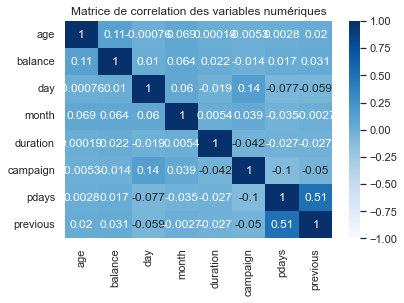

In [38]:
sns.heatmap(df.corr(), cmap = 'Blues', annot=True, vmin=-1, vmax=1)
plt.title('Matrice de correlation des variables numériques')
plt.show()

Il semble qu'il n'y a pas de correlation entre les variables numériques, sauf entre les variables pdays et previous

## Etude de la variable cible "deposit"

In [39]:
print(df['deposit'].value_counts())

no     5873
yes    5289
Name: deposit, dtype: int64


In [40]:
round(df['deposit'].value_counts(normalize=True)*100,2)

no     52.62
yes    47.38
Name: deposit, dtype: float64

52,62% des clients de la campagne n'ont pas contractés de DAT. 47,38% en ont fait un.
Nous concluons que la variable est donc équilibrée.

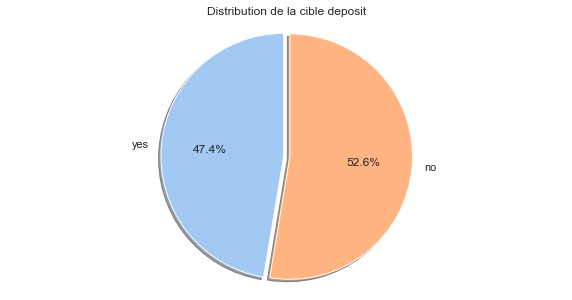

In [41]:
labels = df['deposit'].unique()
fig1, ax1 = plt.subplots(figsize=(10, 5))
colors = sns.color_palette('pastel')
exp = [0,.05]
ax1.pie(df['deposit'].value_counts(ascending=True), explode=exp,colors= colors, labels=labels, autopct='%1.1f%%', pctdistance=0.6,
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Distribution de la cible deposit')
plt.show()

# DATA VISUALISATION

Dans cette partie, nous allons voir quel est le lien entre les variables et la variable cible "deposit".

## Etude de la variable âge

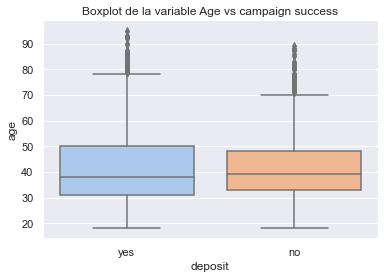

In [42]:
sns.boxplot(x='deposit',y='age',data=df,whis=1.5, palette='pastel')
plt.title('Boxplot de la variable Age vs campaign success')
sns.despine()
plt.show()

Nous observons qu'il serait intéressant de décomposer les clients par tranche d'âge afin d'observer une tendance sur la variable dépôt.

In [43]:
df['Age_Range'] = pd.cut(x=df['age'], bins=[0,30,40,50,60,70, float('Inf')], labels=['18-30', '30-40', '40-50','50-60','60-70', '70-95'])
df.insert(1, 'Age_Range', df.pop('Age_Range')) 

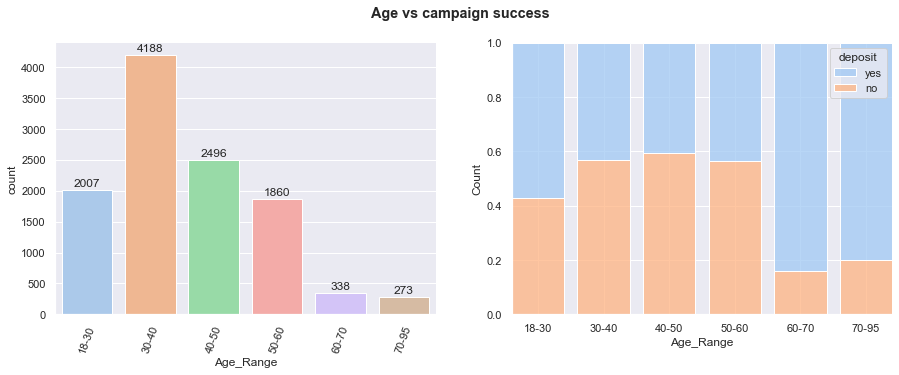

In [44]:
plt.figure(figsize = (15, 5))

plt.subplot(121)

g= sns.countplot(x ='Age_Range', data=df, palette='pastel');
plt.xticks(rotation=70)
plt.suptitle('Répartion de la variable Age_Range');
for container in g.containers:
    g.bar_label(container, padding = 2)
sns.despine()  

plt.subplot(122)
ax = sns.histplot(x='Age_Range', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Age vs campaign success',fontweight ="bold")

plt.show()

In [45]:
#près de 78% des clients prospectés ont moins de 50 ans

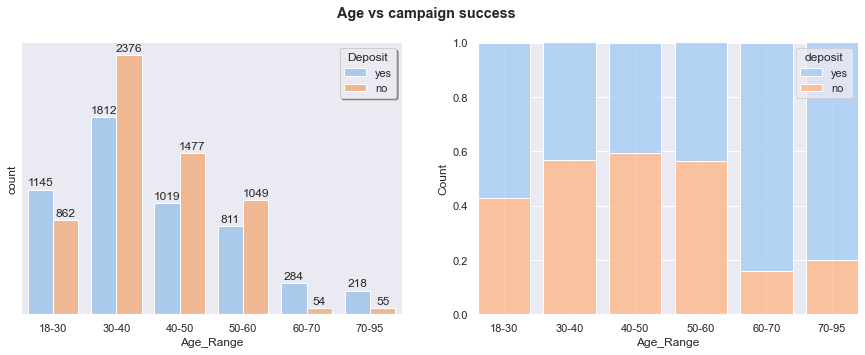

In [46]:
plt.figure(figsize = (15, 5))

plt.subplot(121)


g = sns.countplot(x= 'Age_Range', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='Age_Range', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Age vs campaign success',fontweight ="bold")

plt.show()

La tranche d'âge des 60-95 ans souscrit à plus de 80% un DAT suite à la campagne de marketing comparée aux autres tranches où nous nous situons plutôt dans les 40%.

## Etude de la variable métier

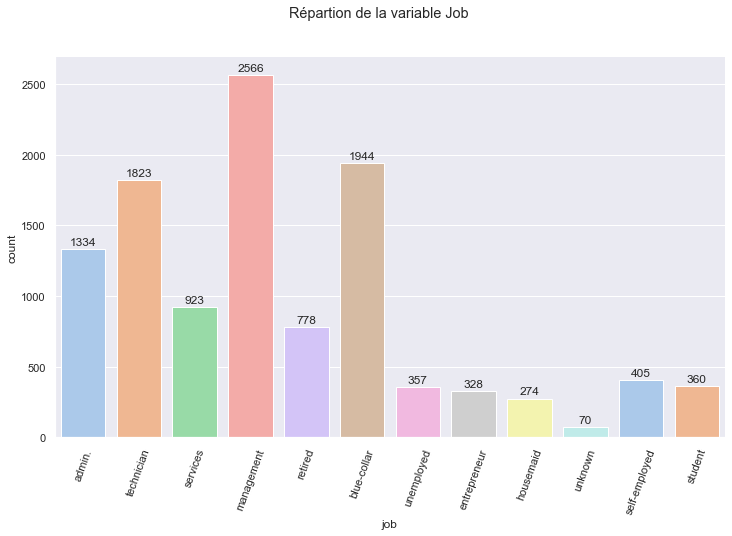

In [47]:
plt.figure(figsize = (12, 7))
g= sns.countplot(x ='job', data=df, palette='pastel');
plt.xticks(rotation=70)
plt.suptitle('Répartion de la variable Job');
for container in g.containers:
    g.bar_label(container, padding = 2)
sns.despine()    
plt.show()

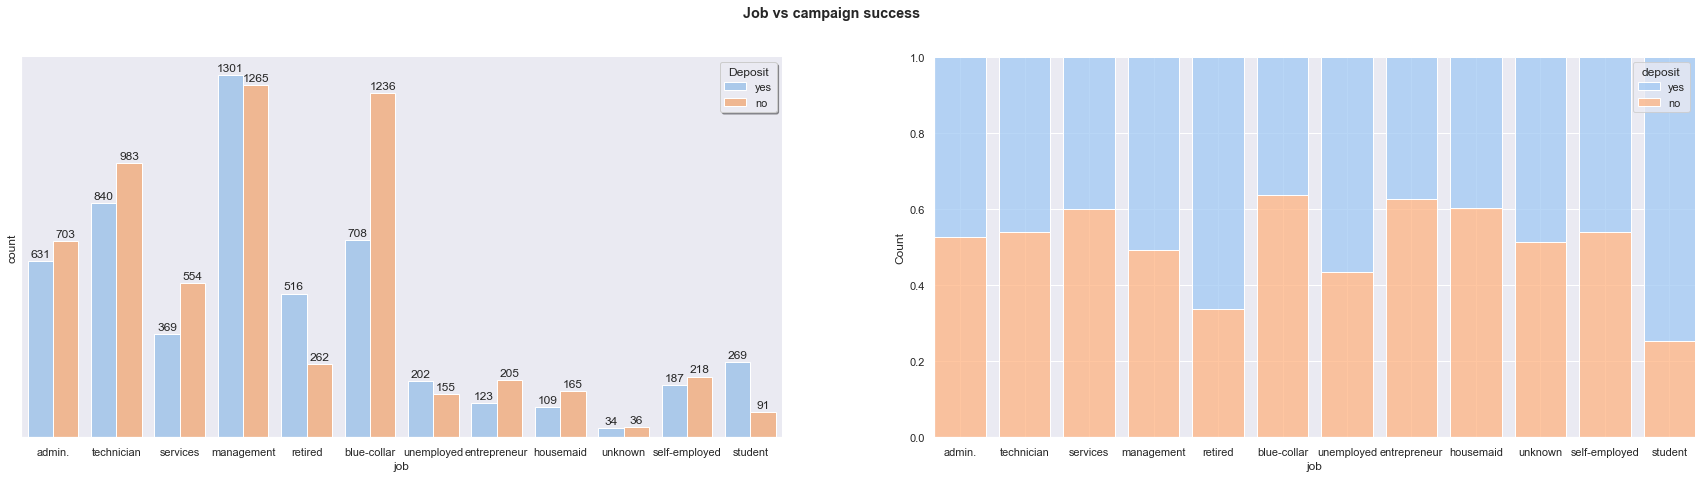

In [48]:
plt.figure(figsize = (30, 7))

plt.subplot(121)


g = sns.countplot(x= 'job', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='job', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')

plt.suptitle('Job vs campaign success',fontweight ="bold")
sns.despine()
plt.show()

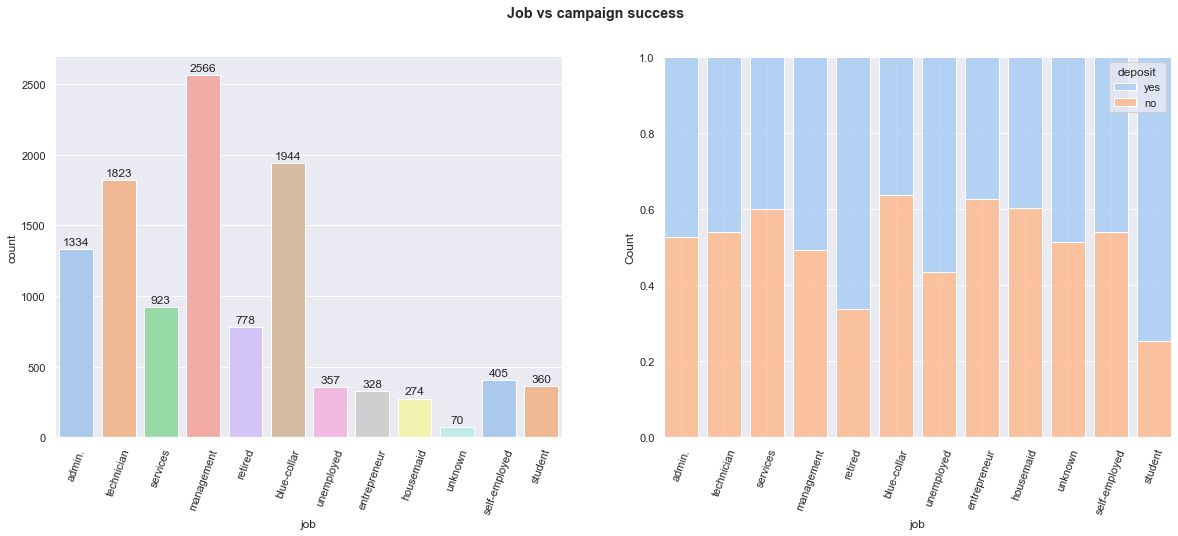

In [49]:
plt.figure(figsize = (20, 7))

plt.subplot(121)

g= sns.countplot(x ='job', data=df, palette='pastel');
plt.xticks(rotation=70)
plt.suptitle('Répartion de la variable Age_Range');
for container in g.containers:
    g.bar_label(container, padding = 2)
sns.despine()  

plt.subplot(122)
ax = sns.histplot(x='job', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
plt.xticks(rotation=70)
sns.despine()
plt.suptitle('Job vs campaign success',fontweight ="bold")

plt.show()

Ces graphiques montrent que certains métiers sont plus ou moins propices à réaliser un dépot à terme. Les métiers moins qualifiés semblent avoir de moins bon resultats. Les étudiants et retraités ont les meilleurs résultats.
Néanmoins, il faut relativiser ces chiffres car un ouvrier (blue collar) qui a pourtant un des moins bon taux de conversion, apportera tout de même 708 DAT, ce qui est non négligeable.

## Etude de l'influence du statut marital

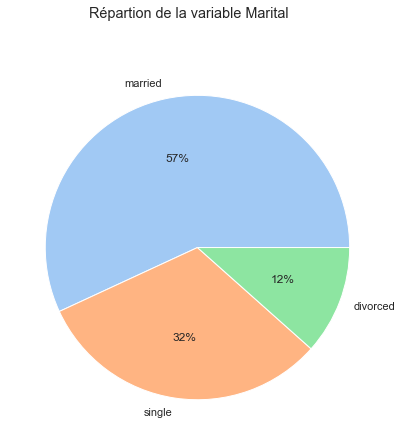

In [50]:

plt.figure(figsize = (10, 7))
plt.suptitle('Répartion de la variable Marital');
colors = sns.color_palette('pastel')
labels = df['marital'].unique()
plt.pie(df.marital.value_counts(),labels= labels, colors = colors, autopct='%.0f%%')

plt.show()

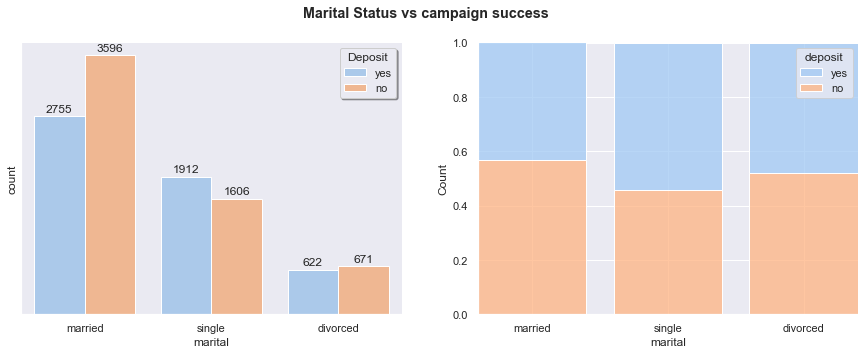

In [51]:
plt.figure(figsize = (15, 5))

plt.subplot(121)


g = sns.countplot(x= 'marital', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='marital', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Marital Status vs campaign success',fontweight ="bold")

plt.show()

En proportion, une personne célibataire aura plus de chance de procéder à un dépot à terme, ensuite une personne divorcée et enfin une personne mariée.
Néanmoins, nous observons un certain équilibre entre le succès et l'échec de la campagne avec un taux aux alentours de 50%.

## Etude de l'influence de l'éducation

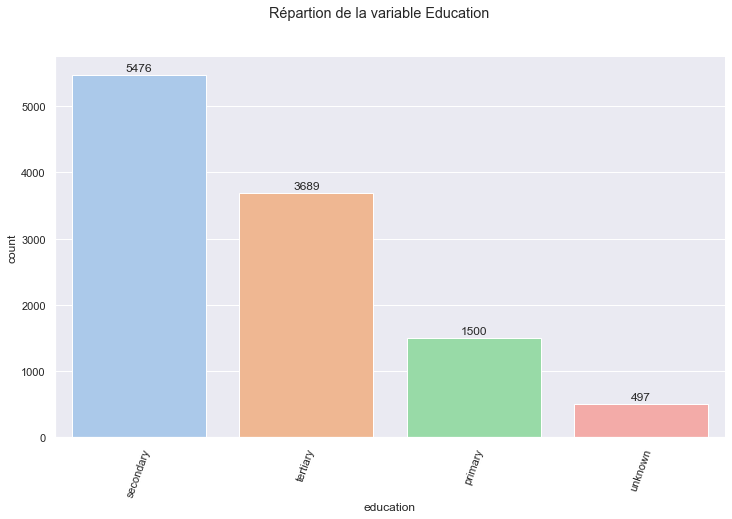

In [52]:
plt.figure(figsize = (12, 7))
g= sns.countplot(x ='education', data=df, palette='pastel');
plt.xticks(rotation=70)
plt.suptitle('Répartion de la variable Education');
for container in g.containers:
    g.bar_label(container, padding = 2)
    
sns.despine()
plt.show()

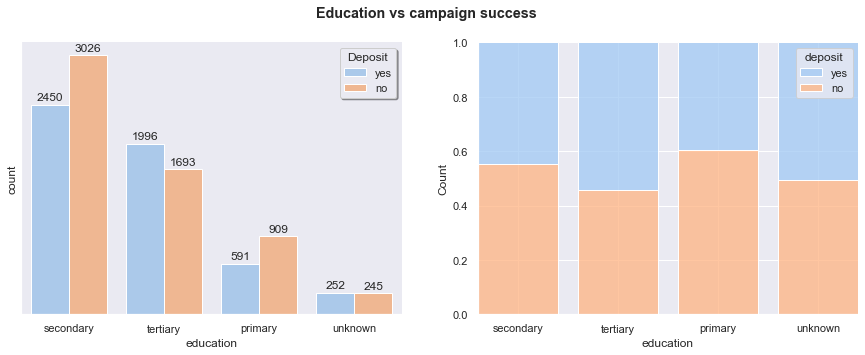

In [53]:
plt.figure(figsize = (15, 5))

plt.subplot(121)


g = sns.countplot(x= 'education', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='education', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Education vs campaign success',fontweight ="bold")

plt.show()

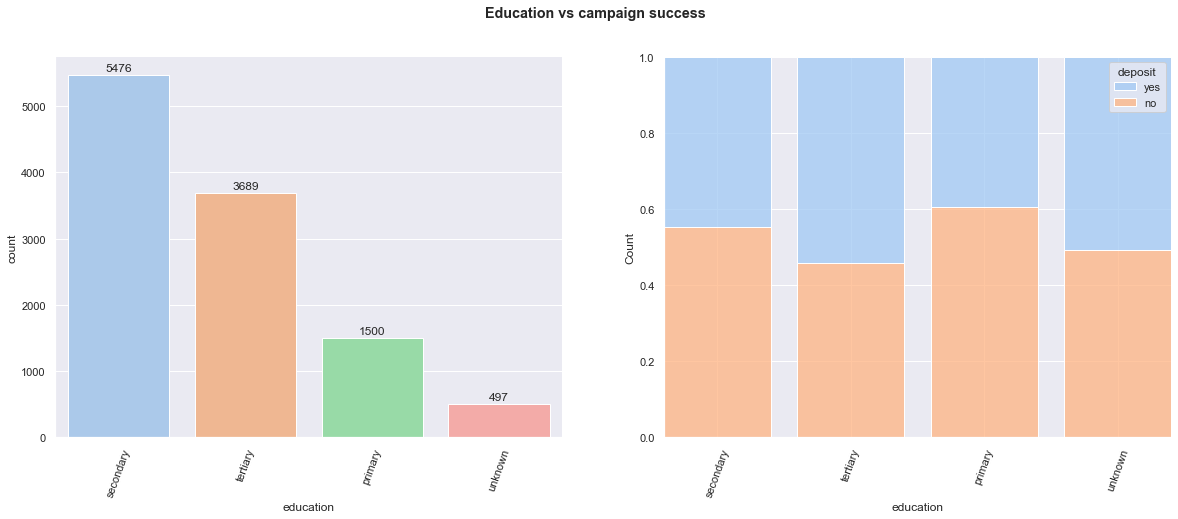

In [54]:
plt.figure(figsize = (20, 7))

plt.subplot(121)

g= sns.countplot(x ='education', data=df, palette='pastel');
plt.xticks(rotation=70)
plt.suptitle('Répartion de la variable Education');
for container in g.containers:
    g.bar_label(container, padding = 2)
sns.despine()  

plt.subplot(122)
ax = sns.histplot(x='education', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
plt.xticks(rotation=70)
sns.despine()
plt.suptitle('Education vs campaign success',fontweight ="bold")

plt.show()

Le niveau d'étude est directement corrélé à la variable cible : plus le niveau d'étude est élevé, plus le pourcentage de réussite d'un DAT est grand.

## Etude de l'influence de la balance du compte client

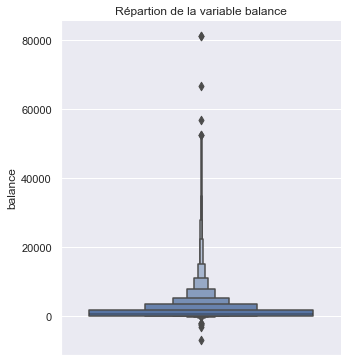

In [55]:
sns.catplot(y='balance', kind = 'boxen', data=df);
plt.title('Répartion de la variable balance');
sns.despine()

On observe qu'il y a des valeurs extrêmes avec des balances positives à +80k euros et des balances négatives à -7k euros, représentant les clients à découverts. La plus grande partie des comptes en banque on moins de 10k euros de solde.

Voyons l'influence du solde bancaire sur le fait de faire un dépot, pour cela nous allons découper la variable 'balance' afin de visualiser les personnes à découvert ou non

In [56]:
df['balance_range'] = pd.cut(x = df['balance'],bins=[-6845,0,1000, 3000, 6000, 10000, 81204])
df.insert(7, 'balance_range', df.pop('balance_range')) 
df.head()

,age,Age_Range,job,marital,education,default,balance,balance_range,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,50-60,admin.,married,secondary,no,2343,"(1000, 3000]",yes,no,unknown,5,5,1042,1,-1,0,unknown,yes
1,56,50-60,admin.,married,secondary,no,45,"(0, 1000]",no,no,unknown,5,5,1467,1,-1,0,unknown,yes
2,41,40-50,technician,married,secondary,no,1270,"(1000, 3000]",yes,no,unknown,5,5,1389,1,-1,0,unknown,yes
3,55,50-60,services,married,secondary,no,2476,"(1000, 3000]",yes,no,unknown,5,5,579,1,-1,0,unknown,yes
4,54,50-60,admin.,married,tertiary,no,184,"(0, 1000]",no,no,unknown,5,5,673,2,-1,0,unknown,yes


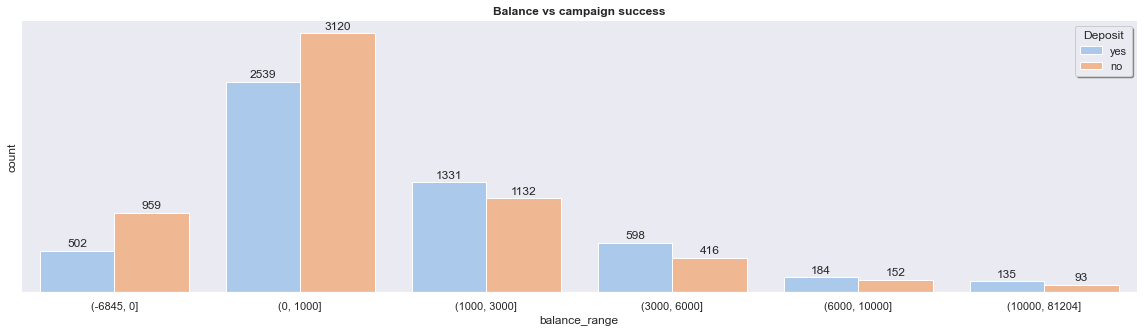

In [57]:
plt.figure(figsize = (20, 5))
g = sns.countplot(x= 'balance_range', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
sns.despine()
plt.title('Balance vs campaign success',fontweight ="bold")

plt.show()

In [58]:
print('BALANCE NEGATIVE')
balanceneg=df[df['balance']<=0]
rapport_bal_neg_deposit = balanceneg['deposit'].value_counts()
print(rapport_bal_neg_deposit)

print('En %')
print(round(balanceneg['deposit'].value_counts(normalize=True)*100,2))

print()
print('BALANCE POSITIVE')
balance_pos=df[df['balance']>0]
rapport_bal_pos_deposit= balance_pos['deposit'].value_counts()
print(rapport_bal_pos_deposit)
print('En %')
print(round(balance_pos['deposit'].value_counts(normalize=True)*100,2))

BALANCE NEGATIVE
no     960
yes    502
Name: deposit, dtype: int64
En %
no     65.66
yes    34.34
Name: deposit, dtype: float64

BALANCE POSITIVE
no     4913
yes    4787
Name: deposit, dtype: int64
En %
no     50.65
yes    49.35
Name: deposit, dtype: float64


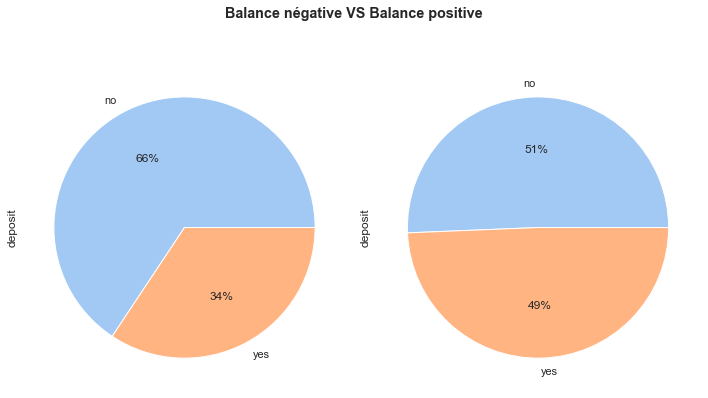

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={"aspect": 'equal'}, figsize=(10, 6))
colors = sns.color_palette('pastel')
balanceneg['deposit'].value_counts().plot.pie(ax=ax1,colors= colors,autopct='%.0f%%')
balance_pos['deposit'].value_counts().plot.pie(ax=ax2,colors= colors, autopct='%.0f%%')
plt.suptitle('Balance négative VS Balance positive',fontweight ="bold")

fig.tight_layout()

In [60]:
neg_bal = len(df[df['balance']<=0]) / len(df['balance'])
print("{:.2%}".format(neg_bal)+ " pourcents des clients ou "+str(int(neg_bal*11162))+ " clients ont une balance négative");


13.10% pourcents des clients ou 1462 clients ont une balance négative


On remarque que malgré des balances négatives sur le compte de certains clients, des dépôts à terme sont tout de même réalisés, pour 34 % d'entre eux. Ce qui est difficilement compréhensible.
Lorsqu'un client a une balance positive, il a  49% de chance de faire un DAT

## Etude de l'influence du défault de paiement 

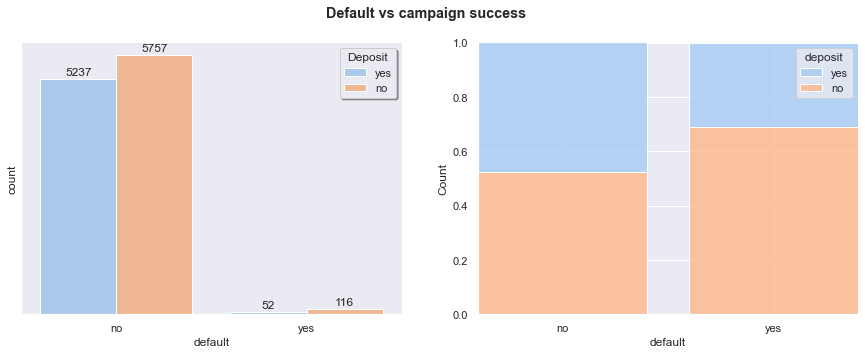

In [61]:
plt.figure(figsize = (15, 5))

plt.subplot(121)


g = sns.countplot(x= 'default', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='default', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Default vs campaign success',fontweight ="bold")

plt.show()

Nous observons qu'il y a très peu de clients en défaut de paiement parmi la population de la campagne. Parmi ceux en défaut de paiement, la majorité d'entre eux a refusé le DAT.
Pour les autres, le résultat est équilibré.
Une personne qui n'est pas en défaut de paiement a de meilleure chance de faire un DAT.

## Etude de l'influence d'un crédit immobilier sur le dépot

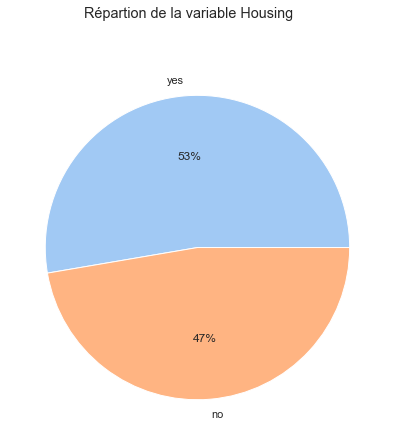

In [62]:

plt.figure(figsize = (10, 7))
plt.suptitle('Répartion de la variable Housing');
colors = sns.color_palette('pastel')
labels = df['housing'].unique()
plt.pie(df.housing.value_counts(),labels= labels, colors = colors, autopct='%.0f%%')

plt.show()

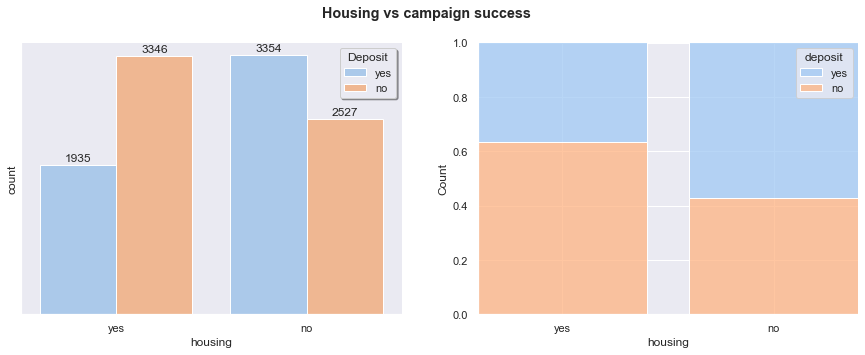

In [63]:
plt.figure(figsize = (15, 5))

plt.subplot(121)


g = sns.countplot(x= 'housing', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='housing', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Housing vs campaign success',fontweight ="bold")

plt.show()

Nous observons que les personnes n'ayant pas de crédit immobilier ont d'avantage tendance à souscrire à un dépôt à terme.
Parmi ceux ayant un crédit immobilier, seulement 40% souscrivent un DAT. A contratio, parmi ceux qui n'ont pas de crédit immobilier, 60% des clients souscrivent un DAT.

## Etude de l'influence d'un crédit consommation sur le dépot

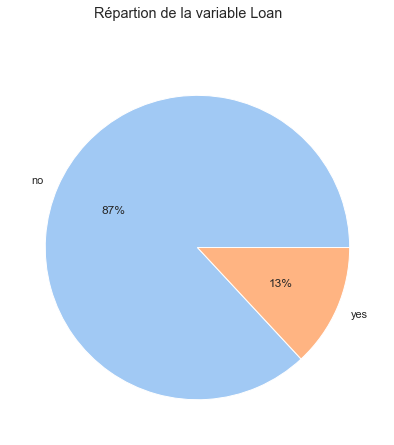

In [64]:
plt.figure(figsize = (10, 7))
plt.suptitle('Répartion de la variable Loan');
colors = sns.color_palette('pastel')
labels = df['loan'].unique()
plt.pie(df.loan.value_counts(),labels= labels, colors = colors, autopct='%.0f%%')

plt.show()

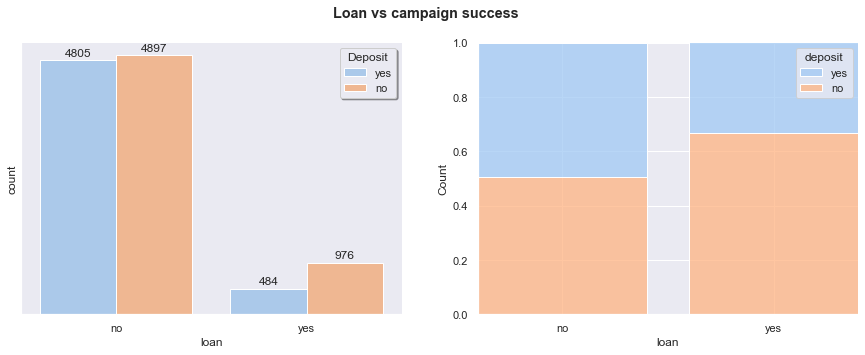

In [65]:
plt.figure(figsize = (15, 5))

plt.subplot(121)


g = sns.countplot(x= 'loan', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='loan', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Loan vs campaign success',fontweight ="bold")

plt.show()

Une faible quantité de personnes ayant un prêt à la consommation a été contacté (environ 13%). Parmi ces derniers, nous observons qu'ils sont moins sensibles à la souscription de DAT (25% des 10%).

## Etude de l'influence du moyen de contact sur le dépot

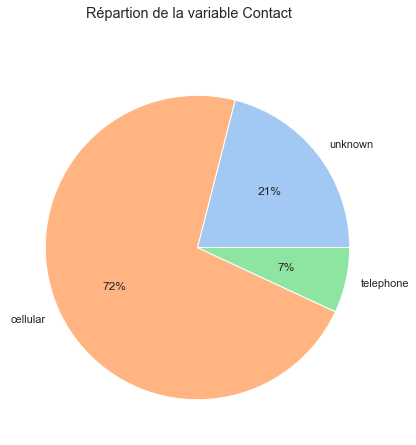

In [66]:
plt.figure(figsize = (10, 7))
plt.suptitle('Répartion de la variable Contact');
colors = sns.color_palette('pastel')
labels = df['contact'].unique()
plt.pie(df.contact.value_counts(sort = False),labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

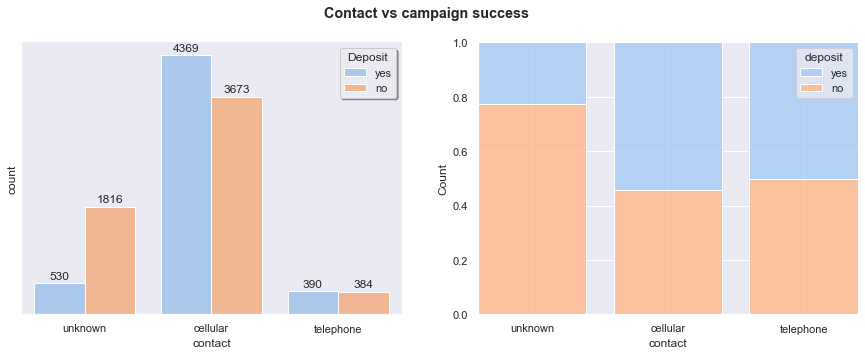

In [67]:
plt.figure(figsize = (15, 5))

plt.subplot(121)


g = sns.countplot(x= 'contact', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='contact', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Contact vs campaign success',fontweight ="bold")

plt.show()

Nous observons que la plus grande majorité des clients et prospects contactés a été réalisé par le biais d'un "cellular" (2/3 de la population etudiée, soit 75%).
En revanche, pour 1/5 de la population ayant répondu à la campagne, le moyen de communication n'est pas connu et se retrouve donc dans la catégorie "unknown".
Cette catégorie 'Unknown' pose problème car nous observons clairement que les clients y faisant partie n'ont pas adhéré à la campagne de marketing et n'ont donc pas souscrit de DAT.
La catégorie 'Unknown' représente tout de même 21% des clients.

## Etude de l'influence du jour du mois

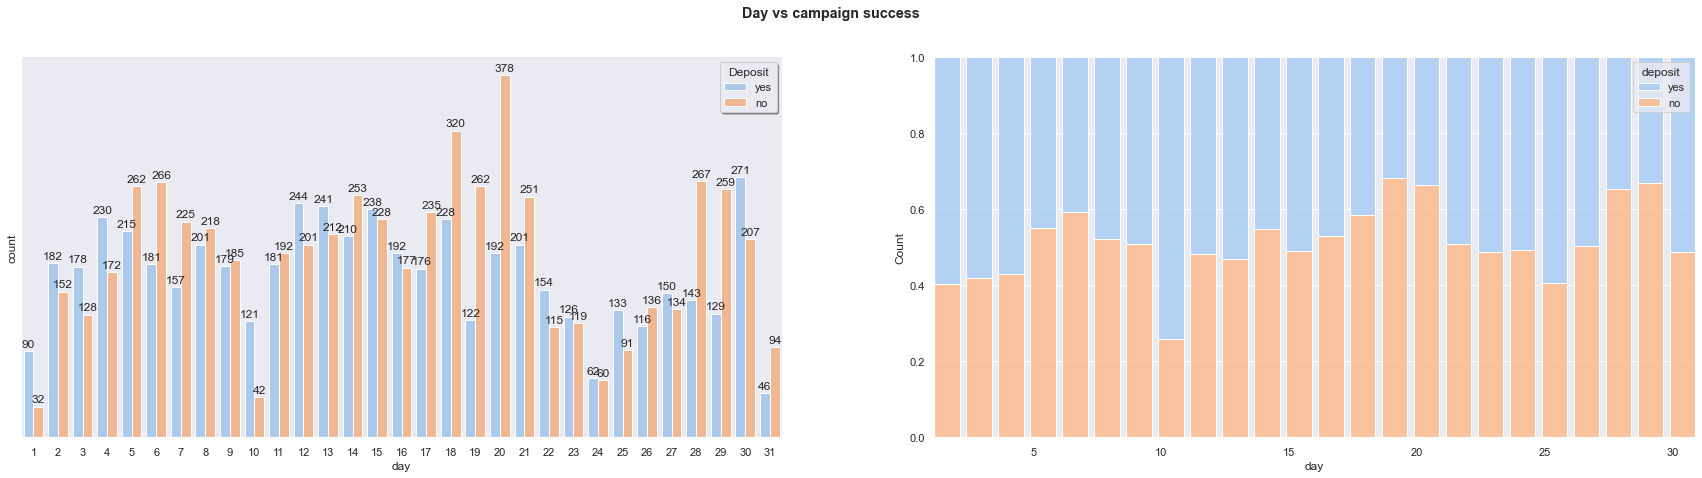

In [68]:
plt.figure(figsize = (30, 7))

plt.subplot(121)


g = sns.countplot(x= 'day', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='day', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Day vs campaign success',fontweight ="bold")

plt.show()

Nous observons que les clients ont davantages tendance à souscrire un DAT en début de mois par rapport à la fin de mois.
Cela semble cohérent si nous rapportons cela à la vie courante et coinciderai donc à la réception des salaires.

## Etude de l'influence du mois

Les valeurs qualitatives de la variable mois sont converties en valeurs quantitatives pour une meilleure utilisation des données. En gardant les valeurs qualitatives, les mois n'étaient pas affichés de manière chronologique

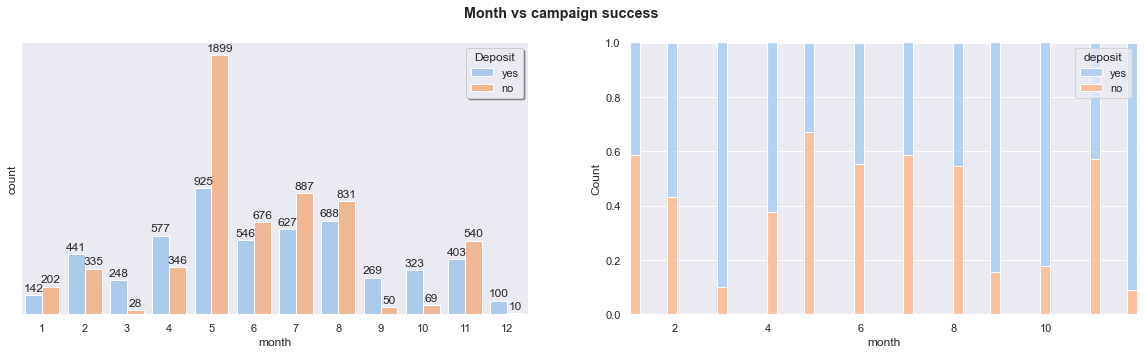

In [69]:
plt.figure(figsize = (20, 5))

plt.subplot(121)


g = sns.countplot(x= 'month', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
ax = sns.histplot(x='month', hue='deposit',multiple='fill', shrink=.8,  data=df, palette='pastel')
sns.despine()
plt.suptitle('Month vs campaign success',fontweight ="bold")

plt.show()

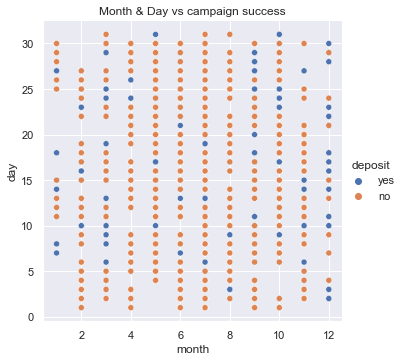

In [70]:
sns.relplot(x="month", y="day", hue="deposit", data=df)
sns.despine()
plt.title('Month & Day vs campaign success');


En complément du graphique précédent, nous observons que la période allant de mai à août est privilégiée pour lancer les campagne de marketing du DAT.
Les mois d'automne et de l'hiver sont plus propices à la souscription d'un DAT, en particulier sur les mois de septembre, octobre, décembre et mars, ce dernier mois pouvant être associé aux paiement des bonus et primes.

## Etude de l'influence du numéro de campagne

Nous nous concentrerons uniquement sur les 5 premières campagnes car elles représentent à elles seules 90% de nos clients

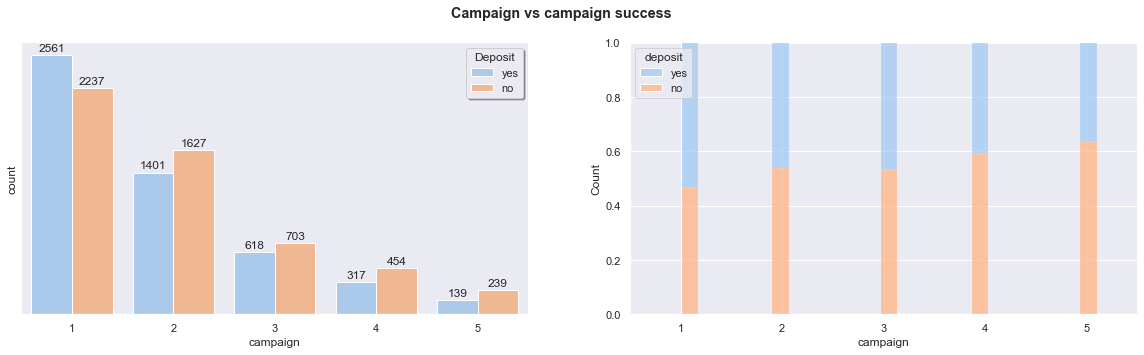

In [71]:
plt.figure(figsize = (20, 5))

plt.subplot(121)


g = sns.countplot(x= 'campaign', hue = 'deposit', data=df, palette='pastel');
g.set_xlim(-0.5,4.5)
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    
plt.subplot(122)

ax = sns.histplot(x='campaign', hue='deposit',multiple='fill', shrink=.9,  data=df, palette='pastel')
ax.set_xlim(0.5,5.5)
sns.despine()
plt.suptitle('Campaign vs campaign success',fontweight ="bold")

plt.show()


Nous observons que les premières campagnes fonctionnent mieux à la souscription d'un DAT par rapport aux suivantes.

## Etude de l'influence du nombre de jour écoulés après la dernière campagne

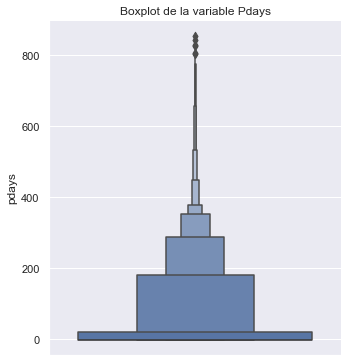

In [72]:
sns.catplot(y='pdays', kind = 'boxen', data=df);
sns.despine()
plt.title('Boxplot de la variable Pdays');

Compte tenu du fait que plus de 8000 clients (les clients en -1) n'ont jamais été contacté auparavant, nous les considérons comme des nouveaux clients.
Lors de la modélisation, nous pourrons séparer la variable pdays en 2 : les nouveaux clients qui ont pour valeur -1 et les anciens.

Afin de continuer notre Data Visualisation, nous créons une nouvelle variable "new_cust".

In [73]:
df['new_cust'] = df['pdays'] == -1
df['new_cust'] = df['new_cust'].map({False:0, True:1})
# df.drop(['pdays'], axis = 1, inplace = True)

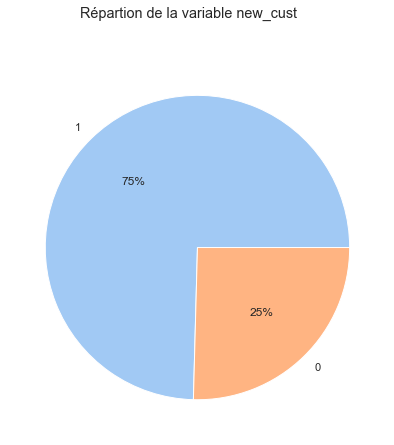

In [74]:
plt.figure(figsize = (10, 7))
plt.suptitle('Répartion de la variable new_cust');
colors = sns.color_palette('pastel')
labels = df['new_cust'].unique()
plt.pie(df.new_cust.value_counts(normalize=True)*100,labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

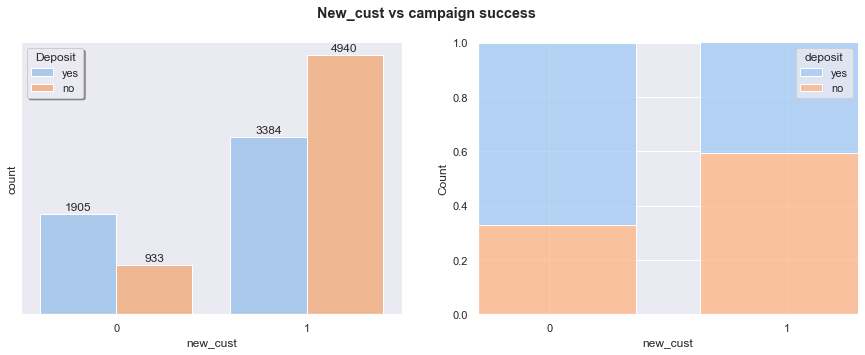

In [75]:
plt.figure(figsize = (15, 5))

plt.subplot(121)


g = sns.countplot(x= 'new_cust', hue = 'deposit', data=df, palette='pastel');
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.subplot(122)
#labels = ['0', '1']
ax = sns.histplot(x='new_cust', hue='deposit', multiple='fill', shrink=10, data=df, palette='pastel')
sns.despine()
plt.suptitle('New_cust vs campaign success',fontweight ="bold")
ax.set_xticks(ticks= [0,1])
plt.show()

On s'apperçoit que 40% des clients ayant participés pour la première fois à la campagne de marketing souscrivent à l'offre alors qu'ils sont près de 70% à le faire lorsqu'ils ont déjà été contacté auparavant.

## Etude de l'influence du nombre de contacts effectués pour un client

Comme pour la variable campaign, nous nous concentrerons uniquement sur les 5 premières campagne car elles représentent à elles seules plus de 90% de nos clients

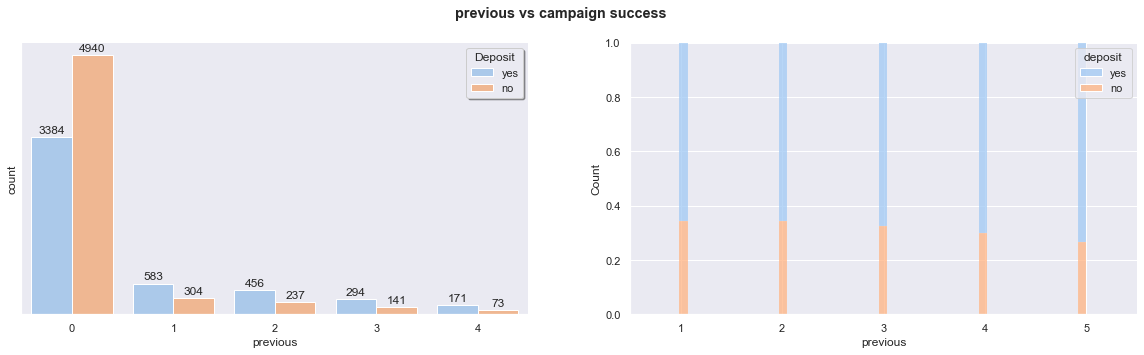

In [76]:
plt.figure(figsize = (20, 5))

plt.subplot(121)


g = sns.countplot(x= 'previous', hue = 'deposit', data=df, palette='pastel');
g.set_xlim(-0.5,4.5)
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
    
plt.subplot(122)

ax = sns.histplot(x='previous', hue='deposit',multiple='fill', shrink=.9,  data=df, palette='pastel')
ax.set_xlim(0.5,5.5)
plt.suptitle('previous vs campaign success',fontweight ="bold")
sns.despine()
plt.show()


In [77]:
print('PREMIER CONTACT')
previouszero=df[df['previous']==0]
print(previouszero['deposit'].value_counts())
print('En %')
print(round(previouszero['deposit'].value_counts(normalize=True)*100,2))
print()
print('CLIENTS CONTACTES PLUSIEURS FOIS')
previouspos=df[df['previous']>0]
print(previouspos['deposit'].value_counts())
print('En %')
print(round(previouspos['deposit'].value_counts(normalize=True)*100,2))

PREMIER CONTACT
no     4940
yes    3384
Name: deposit, dtype: int64
En %
no     59.35
yes    40.65
Name: deposit, dtype: float64

CLIENTS CONTACTES PLUSIEURS FOIS
yes    1905
no      933
Name: deposit, dtype: int64
En %
yes    67.12
no     32.88
Name: deposit, dtype: float64


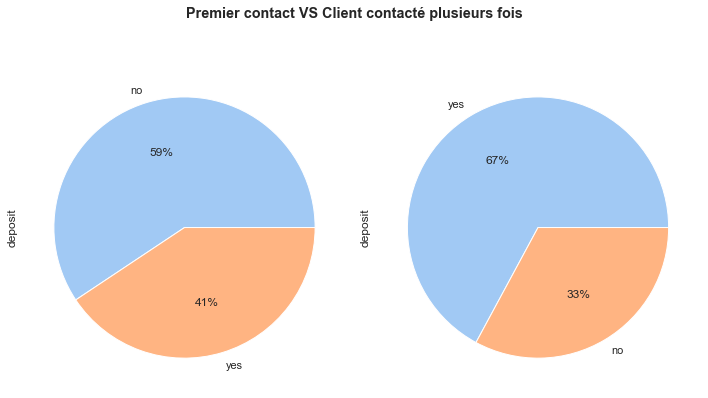

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={"aspect": 'equal'}, figsize=(10, 6))
colors = sns.color_palette('pastel')
previouszero['deposit'].value_counts().plot.pie(ax=ax1,colors= colors,autopct='%.0f%%')
previouspos['deposit'].value_counts().plot.pie(ax=ax2,colors= colors, autopct='%.0f%%')
plt.suptitle('Premier contact VS Client contacté plusieurs fois',fontweight ="bold")

fig.tight_layout()

40,65% des clients contactés pour la première fois ont souscrit à un DAT, alors que plus de 67%de ceux qui ont été contacté plusieurs fois l'ont fait.
On remarque qu'il est interressant de relancer les clients déjà contactés car le pourcentage de chance d'avoir un DAT est plus grand.

## Analyse Statistique test du  χ2 par table de contingence.

Nous réalisons ici un test χ2 pour les variables Age_Range, day, et previous sur la variable cible deposit. L'objectif étant de valider nos observations précédentes.

## Avec hypotese : H0  : "les variables Age_Range et deposit sont indépendantes"

In [79]:
col1 = df['Age_Range']
col2 = df['deposit']
table = pd.crosstab(col1, col2)
table

deposit,no,yes
Age_Range,,
18-30,862,1145
30-40,2376,1812
40-50,1477,1019
50-60,1049,811
60-70,54,284
70-95,55,218


In [80]:
from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(table)

statistique = resultats_test[0]

p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique ,'  ',p_valeur,'       ' ,   degre_liberte)

454.87411991424904    4.363717627983407e-96         5


p-value < 5% donc on rejette H0, les variables sont bien dépendantes

## Avec hypotese : H0 : "les variables balance_range et deposit sont indépendantes"

In [81]:
col1 = df['balance_range']
col2 = df['deposit']
table = pd.crosstab(col1, col2)
table

deposit,no,yes
balance_range,,
"(-6845, 0]",959,502
"(0, 1000]",3120,2539
"(1000, 3000]",1132,1331
"(3000, 6000]",416,598
"(6000, 10000]",152,184
"(10000, 81204]",93,135


p-value < 5% donc on rejette H0, les variables sont bien dépendantes

In [82]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]

p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique ,'  ',p_valeur,'       ' ,   degre_liberte)

232.3097212751555    3.4205904513022796e-48         5


## Avec hypotese : H0  : "les variables new_cust et deposit sont indépendantes"

In [83]:
X = "new_cust"
Y = "deposit"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

deposit,no,yes,Total
new_cust,,,
0,933,1905,2838
1,4940,3384,8324
Total,5873,5289,11162


In [84]:
resultats_test = chi2_contingency(cont)

statistique = resultats_test[0]

p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique ,'  ',p_valeur,'       ' ,   degre_liberte)

594.8401786963253    2.027329990487167e-127         4


p-value > 5% donc on rejette H0, les variables sont bien dépendantes

## Avec hypotese : H0  : "les variables previous et deposit sont indépendantes"

In [85]:
col4 = df['previous']
col2 = df['deposit']
table = pd.crosstab(col4, col2)

In [86]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]

p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique ,'  ',p_valeur,'       ' ,   degre_liberte)

638.753008735154    2.627898888989471e-113         33


p-value < 5% donc on rejette H0, les varibles sont bien dépendantes

# MODELISATION DES DONNEES

# Tout d'abord il faut encoder les variables catégorielles et standardiser les variables numériques

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            11162 non-null  int64   
 1   Age_Range      11162 non-null  category
 2   job            11162 non-null  object  
 3   marital        11162 non-null  object  
 4   education      11162 non-null  object  
 5   default        11162 non-null  object  
 6   balance        11162 non-null  int64   
 7   balance_range  11161 non-null  category
 8   housing        11162 non-null  object  
 9   loan           11162 non-null  object  
 10  contact        11162 non-null  object  
 11  day            11162 non-null  int64   
 12  month          11162 non-null  int64   
 13  duration       11162 non-null  int64   
 14  campaign       11162 non-null  int64   
 15  pdays          11162 non-null  int64   
 16  previous       11162 non-null  int64   
 17  poutcome       11162 non-null  

## On supprime les variables Age_Range, balance_range, duration et pdays 
## poutcome et contact ont toutes les deux beaucoup de valeurs unknown donc on va tester le modèle sans ces deux variables

In [88]:
df.drop(['Age_Range', 'balance_range','duration','pdays','poutcome', 'contact'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  int64 
 10  campaign   11162 non-null  int64 
 11  previous   11162 non-null  int64 
 12  deposit    11162 non-null  object
 13  new_cust   11162 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.2+ MB


In [89]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,deposit,new_cust
0,59,admin.,married,secondary,no,2343,yes,no,5,5,1,0,yes,1
1,56,admin.,married,secondary,no,45,no,no,5,5,1,0,yes,1
2,41,technician,married,secondary,no,1270,yes,no,5,5,1,0,yes,1
3,55,services,married,secondary,no,2476,yes,no,5,5,1,0,yes,1
4,54,admin.,married,tertiary,no,184,no,no,5,5,2,0,yes,1


In [90]:
# On peut dès à présent remplacer les variables catégorielles deposit, default, housing, loan et éducation 

In [91]:
df['deposit']= df['deposit'].replace(['yes','no'],[1,0])
df['default']= df['default'].replace(['yes','no'],[1,0])
df['housing']= df['housing'].replace(['yes','no'],[1,0])
df['loan']= df['loan'].replace(['yes','no'],[1,0])
#df['education'] = df['education'].map({'primary':1,'secondary':2,'tertiary':3, 'unknown':0})
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,deposit,new_cust
0,59,admin.,married,secondary,0,2343,1,0,5,5,1,0,1,1
1,56,admin.,married,secondary,0,45,0,0,5,5,1,0,1,1
2,41,technician,married,secondary,0,1270,1,0,5,5,1,0,1,1
3,55,services,married,secondary,0,2476,1,0,5,5,1,0,1,1
4,54,admin.,married,tertiary,0,184,0,0,5,5,2,0,1,1


In [92]:
# On sépare notre variable cible du reste de nos données et on divise en test et train notre dataframe

In [93]:
from sklearn.model_selection import train_test_split
y = df['deposit']
X = df.drop('deposit', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 12)

print("Train Set:", X_train.shape)
print("Test Set:", X_test.shape)


Train Set: (8929, 13)
Test Set: (2233, 13)


In [94]:
# Utilisation du OneHotEncoder pour encoder nos données catégorielles nominales

In [95]:
from sklearn.preprocessing import OneHotEncoder

#s = (X_train.dtypes == 'object')
object_cols =['job', 'marital','education'] #list(s[s].index)

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(ohe.fit_transform(X_train[object_cols]),columns = ohe.get_feature_names(object_cols))
OH_cols_test = pd.DataFrame(ohe.transform(X_test[object_cols]),columns = ohe.get_feature_names(object_cols))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)


In [96]:
object_cols

['job', 'marital', 'education']

In [97]:
OH_X_train

,age,default,balance,housing,loan,day,month,campaign,previous,new_cust,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
76,39,0,94,1,1,16,5,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9757,32,0,390,1,0,23,5,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9387,55,0,1279,1,0,13,5,3,8,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3356,35,0,5958,1,0,22,3,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1906,46,0,3,1,1,12,5,3,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,41,0,5329,0,0,14,7,2,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7409,50,0,237,1,1,30,5,4,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3325,44,0,282,0,0,9,3,2,3,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9606,48,0,-205,1,1,9,7,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [98]:
OH_X_test

,age,default,balance,housing,loan,day,month,campaign,previous,new_cust,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
6010,49,0,-2049,1,0,30,5,3,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4059,44,0,1090,0,0,20,10,4,6,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7624,54,0,3611,1,0,5,2,1,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5145,33,0,935,0,0,9,2,2,8,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2276,28,0,171,0,0,5,6,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11045,27,0,139,0,0,25,7,3,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7976,32,0,1307,1,0,28,5,2,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4351,33,0,478,0,0,30,4,2,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8564,44,0,1,0,0,31,7,4,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
OH_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 76 to 5787
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  8929 non-null   int64  
 1   default              8929 non-null   int64  
 2   balance              8929 non-null   int64  
 3   housing              8929 non-null   int64  
 4   loan                 8929 non-null   int64  
 5   day                  8929 non-null   int64  
 6   month                8929 non-null   int64  
 7   campaign             8929 non-null   int64  
 8   previous             8929 non-null   int64  
 9   new_cust             8929 non-null   int64  
 10  job_admin.           8929 non-null   float64
 11  job_blue-collar      8929 non-null   float64
 12  job_entrepreneur     8929 non-null   float64
 13  job_housemaid        8929 non-null   float64
 14  job_management       8929 non-null   float64
 15  job_retired          8929 non-null   

In [100]:
# Utilisation de StandardScaler pour standardiser les variables numériques

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(OH_X_train)
X_test_scaled = scaler.transform(OH_X_test)

# Modélisation avec 6 méthodes différentes de machine learning

In [102]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

cl1 = LogisticRegression()
cl1.fit(X_train_scaled, y_train)
print("Accuracy score de la Régression Logistique : ",
      cl1.score(X_test_scaled, y_test))

cl2 = DecisionTreeClassifier()
cl2.fit(X_train_scaled, y_train)
print("Accuracy score de l'Arbre de Décision : ",
      cl2.score(X_test_scaled, y_test))

cl3 = RandomForestClassifier()
cl3.fit(X_train_scaled, y_train)
print("Accuracy score de la Random Forest : ",
      cl3.score(X_test_scaled, y_test))

cl4 = neighbors.KNeighborsClassifier()
cl4.fit(X_train_scaled, y_train)
print("Accuracy score de KNN : ",
      cl4.score(X_test_scaled, y_test))

cl5 = svm.SVC()
cl5.fit(X_train_scaled, y_train)
print("Accuracy score de SVM : ",
      cl5.score(X_test_scaled, y_test))

cl6 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8,
    max_depth=2, random_state=0)
cl6.fit(X_train_scaled, y_train)
print("Accuracy score de  GradientBoosting : ",
      cl6.score(X_test_scaled, y_test))

Accuracy score de la Régression Logistique :  0.6686072548141514
Accuracy score de l'Arbre de Décision :  0.6274070756829377
Accuracy score de la Random Forest :  0.7062248096730855
Accuracy score de KNN :  0.6520376175548589
Accuracy score de SVM :  0.6672637707120466
Accuracy score de  GradientBoosting :  0.7111509180474698


# Calcul de la durée d'éxecution de chacun des modèles

In [107]:
from datetime import datetime
start_time = datetime.now()
cl1.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de la Régression Logistique: {}".format(end_time - start_time))

from datetime import datetime
start_time = datetime.now()
cl2.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de l'Arbre de Décision: {}".format(end_time - start_time))

from datetime import datetime
start_time = datetime.now()
cl3.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de Random Forest: {}".format(end_time - start_time))

from datetime import datetime
start_time = datetime.now()
cl4.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de KNN: {}".format(end_time - start_time))

from datetime import datetime
start_time = datetime.now()
cl5.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de SVM: {}".format(end_time - start_time))

from datetime import datetime
start_time = datetime.now()
cl6.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de GradientBoosting : {}".format(end_time - start_time))

Durée d'éxecution de l'algorithme de la Régression Logistique: 0:00:00.018922
Durée d'éxecution de l'algorithme de l'Arbre de Décision: 0:00:00.080983
Durée d'éxecution de l'algorithme de Random Forest: 0:00:00.957175
Durée d'éxecution de l'algorithme de KNN: 0:00:00.000996
Durée d'éxecution de l'algorithme de SVM: 0:00:05.033950
Durée d'éxecution de l'algorithme de GradientBoosting : 0:00:00.832410


In [103]:
from datetime import datetime
start_time = datetime.now()
cl1.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de la Régression Logistique: {}".format(end_time - start_time))

Durée d'éxecution de l'algorithme de la Régression Logistique: 0:00:00.016954


In [104]:
from datetime import datetime
start_time = datetime.now()
cl2.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de l'Arbre de Décision: {}".format(end_time - start_time))

Durée d'éxecution de l'algorithme de l'Arbre de Décision: 0:00:00.073822


In [105]:
from datetime import datetime
start_time = datetime.now()
cl3.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de Random Forest: {}".format(end_time - start_time))

Durée d'éxecution de l'algorithme de Random Forest: 0:00:01.118651


In [106]:
from datetime import datetime
start_time = datetime.now()
cl4.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de KNN: {}".format(end_time - start_time))

Durée d'éxecution de l'algorithme de KNN: 0:00:00.002027


In [252]:
from datetime import datetime
start_time = datetime.now()
cl5.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de SVM: {}".format(end_time - start_time))

Durée d'éxecution de l'algorithme de SVM: 0:00:05.008907


In [253]:
from datetime import datetime
start_time = datetime.now()
cl6.fit(X_train_scaled, y_train)
end_time = datetime.now()
print("Durée d'éxecution de l'algorithme de GradientBoosting : {}".format(end_time - start_time))

Durée d'éxecution de l'algorithme de GradientBoosting : 0:00:00.736030


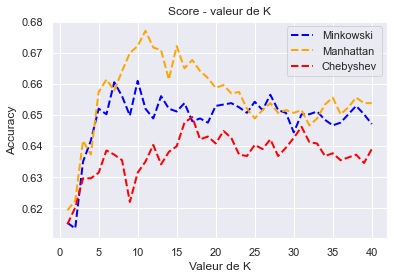

In [254]:
score_minko = []
score_man = []
score_cheb = []

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score_minko.append(knn.score(X_test_scaled, y_test))

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train_scaled, y_train)
    score_man.append(knn.score(X_test_scaled, y_test))
    
for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train_scaled, y_train)
    score_cheb.append(knn.score(X_test_scaled, y_test))
    
plt.plot(range(1, 41), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 41), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 41), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')  
plt.xlabel('Valeur de K')  
plt.ylabel('Accuracy') 
plt.legend();


# Utilisation de Gridsearch CV pour le modèle de Random Forest

In [255]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [256]:
GSRF = GridSearchCV(estimator=cl3, param_grid=param_grid, cv= 5)
GSRF.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [257]:
GSRF.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [258]:
clgsfr = RandomForestClassifier(n_estimators=500, max_depth=8,max_features='auto',criterion='gini',
                             random_state=50)

In [259]:
clgsfr.fit(X_train_scaled, y_train)
print("Accuracy score de GridSearch CV avec Random Forest : ",
      clgsfr.score(X_test_scaled, y_test))


Accuracy score de GridSearch CV avec Random Forest :  0.6995073891625616


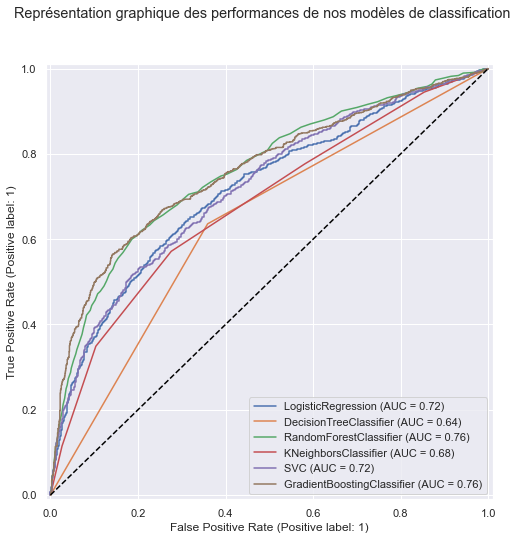

In [260]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

fig, ax = plt.subplots(figsize=(8,8))
plot_roc_curve(cl1, X_test_scaled, y_test, ax=ax)
plot_roc_curve(cl2, X_test_scaled, y_test, ax=ax)
plot_roc_curve(cl3, X_test_scaled, y_test, ax=ax)
plot_roc_curve(cl4, X_test_scaled, y_test, ax=ax)
plot_roc_curve(cl5, X_test_scaled, y_test, ax=ax)
plot_roc_curve(cl6, X_test_scaled, y_test, ax=ax)

plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--')
plt.xlim(-.01, 1.01)
plt.ylim(-.01, 1.01)
plt.suptitle('Représentation graphique des performances de nos modèles de classification')
plt.show()

Il y a deux paramètres de cette courbe :

True Positive Rate (TPR) - Signifie réel, c’est-à-dire une vraie sensibilité
Taux de faux positifs (FPR) - Signifie pseudo, c’est-à-dire fausse sensibilité
Les deux paramètres sont appelés caractéristiques de fonctionnement et sont utilisés comme facteurs pour définir la courbe ROC.

En Python, l’efficacité du modèle est déterminée en observant l’aire sous la courbe (AUC). Ainsi, le modèle le plus efficace a une AUC égale à 1, et le modèle le moins efficace a une AUC égale à 0,5.
Ici, la Random Forest et le GradiantBoost ont le même résultat.

Afin de choisir notre modèle, nous allons nous attarder sur les matrices de confusion de chacun ainsi que sur leurs évaluations

# Comparaison des différents modèles avec les évalutions et les matrices de confusion de chacun

In [261]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [262]:
def evaluation(model):
    model.fit(X_train_scaled, y_train)
    ypred = model.predict(X_test_scaled)
    print (confusion_matrix(y_test, ypred))
    print (classification_report(y_test, ypred))

In [263]:
print ("Evaluation du modèle de Regression logistique", evaluation(cl1))

[[859 319]
 [421 634]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1178
           1       0.67      0.60      0.63      1055

    accuracy                           0.67      2233
   macro avg       0.67      0.67      0.67      2233
weighted avg       0.67      0.67      0.67      2233

Evaluation du modèle de Regression logistique None


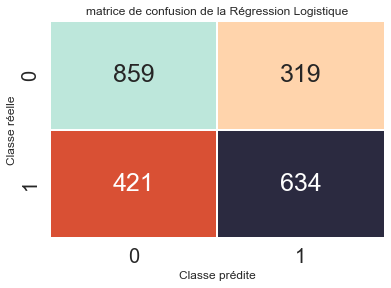

In [264]:
y_pred = cl1.predict(X_test_scaled)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'icefire_r', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.title('matrice de confusion de la Régression Logistique')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [265]:
print(evaluation(cl2),"Evaluation du modèle de l'arbre de décision")

[[751 427]
 [398 657]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      1178
           1       0.61      0.62      0.61      1055

    accuracy                           0.63      2233
   macro avg       0.63      0.63      0.63      2233
weighted avg       0.63      0.63      0.63      2233

None Evaluation du modèle de l'arbre de décision


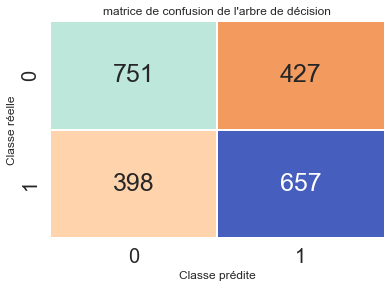

In [266]:
y_pred = cl2.predict(X_test_scaled)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'icefire_r', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.title("matrice de confusion de l'arbre de décision")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [267]:
print ('Evaluation du modèle de Random Forest',evaluation(cl3))

[[911 267]
 [412 643]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1178
           1       0.71      0.61      0.65      1055

    accuracy                           0.70      2233
   macro avg       0.70      0.69      0.69      2233
weighted avg       0.70      0.70      0.69      2233

Evaluation du modèle de Random Forest None


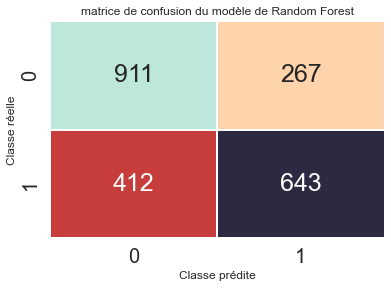

In [268]:
y_pred = cl3.predict(X_test_scaled)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'icefire_r', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.title("matrice de confusion du modèle de Random Forest")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [269]:
print(evaluation(cl4),"Evaluation du modèle de KNN")

[[853 325]
 [452 603]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.69      1178
           1       0.65      0.57      0.61      1055

    accuracy                           0.65      2233
   macro avg       0.65      0.65      0.65      2233
weighted avg       0.65      0.65      0.65      2233

None Evaluation du modèle de KNN


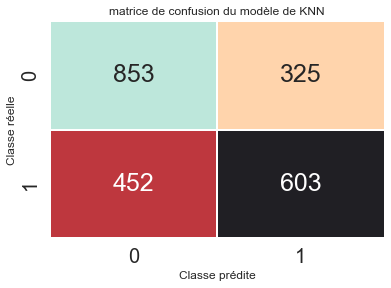

In [270]:
y_pred = cl4.predict(X_test_scaled)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'icefire_r', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.title("matrice de confusion du modèle de KNN")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [271]:
print(evaluation(cl5),"Evaluation du modèle de SVM")

[[925 253]
 [490 565]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1178
           1       0.69      0.54      0.60      1055

    accuracy                           0.67      2233
   macro avg       0.67      0.66      0.66      2233
weighted avg       0.67      0.67      0.66      2233

None Evaluation du modèle de SVM


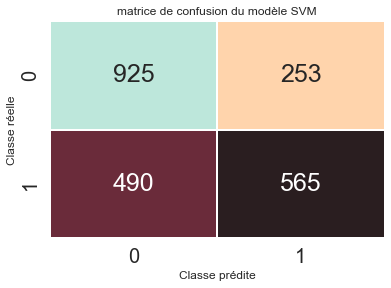

In [272]:
y_pred = cl5.predict(X_test_scaled)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'icefire_r', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.title("matrice de confusion du modèle SVM")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [273]:
print(evaluation(cl6),"Evaluation du modèle de GradientB")

[[947 231]
 [414 641]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1178
           1       0.74      0.61      0.67      1055

    accuracy                           0.71      2233
   macro avg       0.72      0.71      0.71      2233
weighted avg       0.71      0.71      0.71      2233

None Evaluation du modèle de GradientB


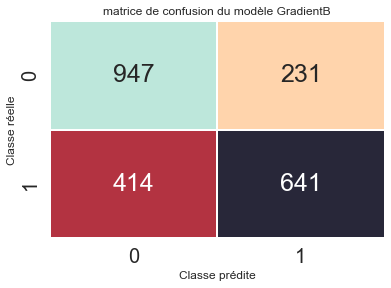

In [274]:
y_pred = cl6.predict(X_test_scaled)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'icefire_r', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.title("matrice de confusion du modèle GradientB")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [275]:
print ('Evaluation du modèle de Random Forest avec GridSearch CV',evaluation(clgsfr))

[[985 193]
 [478 577]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.75      1178
           1       0.75      0.55      0.63      1055

    accuracy                           0.70      2233
   macro avg       0.71      0.69      0.69      2233
weighted avg       0.71      0.70      0.69      2233

Evaluation du modèle de Random Forest avec GridSearch CV None


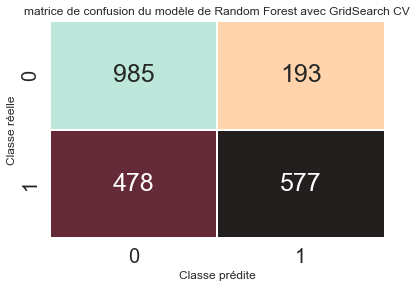

In [276]:
y_pred = clgsfr.predict(X_test_scaled)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'icefire_r', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.title("matrice de confusion du modèle de Random Forest avec GridSearch CV")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [277]:
label_pred= cl3.predict(X_test_scaled)

In [278]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true=y_test, y_pred=label_pred)
print(f1)

0.6544529262086514


 Les meilleurs resultats sont ceux de la Random Froest et du GradientB.
 Le F1-score est une métrique de classification qui mesure la capacité d’un modèle à bien prédire les individus positifs, tant en termes de precision (taux de prédictions positives correctes) qu’en termes de recall  (taux de positifs correctement prédits). Il correspond en effet à la moyenne harmonique de ces indicateurs, qui doivent tous deux être élevés pour que le F1-score le soit aussi.


 Ainsi pour notre cas, il vaut mieux nous fixer sur le modèle du GradientBoosting car son F1-score est légèrement supérieur à celui de la Random Forest.

# Analyse du poids des variables pour le modèle de régression logistique

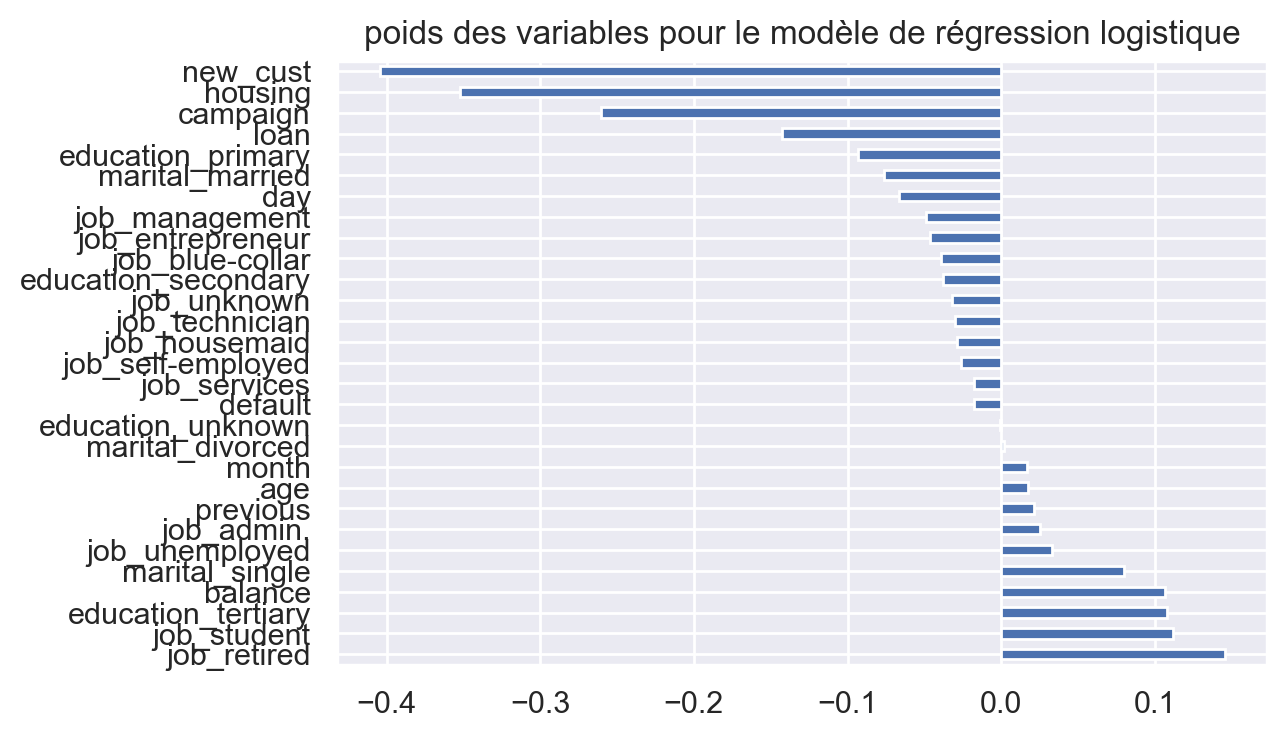

In [280]:
plt.rcParams['figure.dpi'] = 200
pd.Series(cl1.coef_[0], OH_X_train.columns).sort_values(ascending=False).plot(kind='barh');
plt.title("poids des variables pour le modèle de régression logistique");


Comme on peut le voir sur ce graph, les retraités, le niveau d'étude, les étudiants, la balance sur le compte, les célibataire et dans une moindre mesure: les chômeurs, le nombre de contacts effectués pour un client, l'âge, les personnes travaillant dans l'administration sont les personnes qui tendent le plus à souscrire un DAT.
Les autres variables vont plutôt tendre vers le non.